# Salary Scale Classification with Random Forest Classifier

#### Introduction
#### 1 Exploratory Data Analysis
1.1 Exploration Numerical Variables Analysis

1.2 Exploration Catalogical Variables Analysis
#### 2 Preprocessing
2.1 Dealing with Missing Data

2.2 Dealing with Outliers
#### 3 Feature Extraction
3.1 Categorical Data Encoding
#### 4 Hypothesis Testing
#### 5 Statistical Learning
5.1 Feature Scaling

5.2 Dataset Split

5.3 Models Training

#### 6 References

### Introduction
The advent of the big data era has made more and more people interested in data science job. What are the salaries for data scientists? This is a question many people are concerned about. Therefore, we use a dataset about salaries of jobs in the Data Science domain . There are experience level, company size, job titles, salary_in_usd and etc. 11 attributes.

In order to answer the question which people concerned. We use separate hypothesis test and classification method in our project. Our hypothesis test is to verify that the average annual salary for data science is higher than $100,000. Our classification task is to determine the salary level of a person given some features. We assume that "salary_in_usd is "high level" if it is higher than or equal to the sample mean, otherwise it is "low level". Therefore, we processed the data by adding a "scale" column, which indicates the salary level. 'scale' is the response variable we want to predict using other variables.

At first, we analyze numerical and categorical variables seperately with EDA.After that, we validate the hypothesis test which we have proposed. Then we perform feature extraction, feature scaling and dataset splitting on the dataset and choose random forest algorithm as classifier to predict someone's salary level(scale).

### 1 Exploratory Data Analysis

In [128]:
#import libraries

import numpy as np #arithmetic operations
import pandas as pd #data processing
import matplotlib.pyplot as plt #data Visualization
import seaborn as sns #data Visualization
import category_encoders as ce #categorical data encoding
from sklearn.compose import ColumnTransformer #categorical data encoding
from sklearn.model_selection import train_test_split #dataset split
from sklearn.preprocessing import RobustScaler # data scaling
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import statsmodels.stats.weightstats as sw 

Load the dataset

the first and last three rows of the data for an overview of the data

In [129]:
df = pd.read_csv('ds_salaries.csv')
# Becaus we want to do classification. We added a column to define high/low salary. high: salary_in_usd value >= mean of salary_in_usd low:salary_in_usd value < mean of salary_in_usd
salary_mean = df['salary_in_usd'].mean()
scale = []
for i in range(len(df)):
    if df['salary_in_usd'].iloc[i]>= salary_mean:
        scale.append("high")
    else:
        scale.append("low")
df["scale"] = scale
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,scale
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,low


In [130]:
df.tail(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,scale
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,high
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,high
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L,high


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
 11  scale               607 non-null    object
dtypes: int64(4), object(8)
memory usage: 57.0+ KB


From the data RangeIndex and column, we can know that the data contains 607 samples and  12 attributes.

The data set is divided into two types of variables, categorical variables with data type object and numerical variables with data type int64.

**'scale' is the response variable.** The following is an exploration of the different variables around scale.

#### 1. 1 Exploration Numerical Variables Analysis
From the df.info() it is known that there are 4 numerical variables: 'work_year', 'salary', 'salary_in_usd', 'remote_ratio',all numerical data are discrete.

In [132]:
numerical_num = []
for i in df.columns:
    if df[i].dtype == 'int64':
        numerical_num.append(i)
        
df[numerical_num].head()

,work_year,salary,salary_in_usd,remote_ratio
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50


Show the descriptive statistics

In [133]:
#numerical data
df[numerical_num].describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


**Exlpore 'work_year' variable**

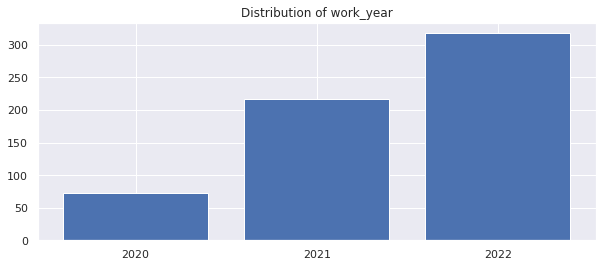

In [134]:
work_year = pd.DataFrame(df.iloc[:,0])
work_year = df.groupby('work_year').salary_in_usd.count()
#print(work_year)
y_axis = [work_year.iloc[i] for i in range(len(work_year))]
x_axis = [str(i) for i in work_year.index]
#print(x_axis)
#print(y_axis)
plt.figure(figsize=(10,4))
plt.title('Distribution of work_year')
plt.bar(x_axis,y_axis)
plt.show()

'work_year' variable is negatively skewed.

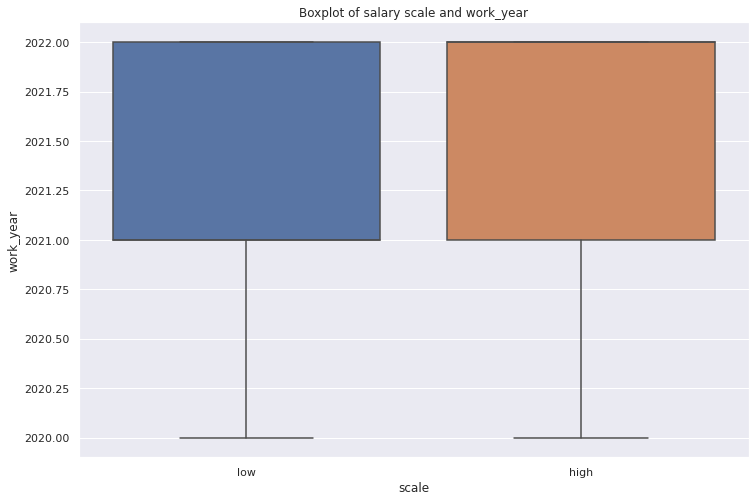

In [135]:
scale = df.iloc[:,11]
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x=scale, y='work_year', data=df)
ax.set_title("Boxplot of salary scale and work_year")
plt.show()

From the box plot, the distribution of high and low salaries scale across work_year is nearly similar.

**Exlpore 'remote_ratio' variable**

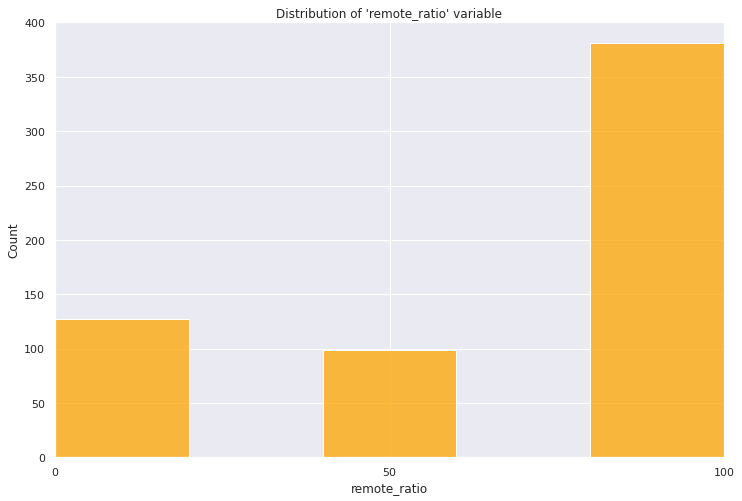

In [136]:
remote_ratio = df.iloc[:,8]
fig = sns.histplot(remote_ratio,bins=5,color='orange')
plt.title("Distribution of 'remote_ratio' variable")
plt.xticks([0,50,100])
fig.set_xlim(0,100)
plt.show()

It can be seen that the distribution of 'remote_ratio' is obviously negatively skewed

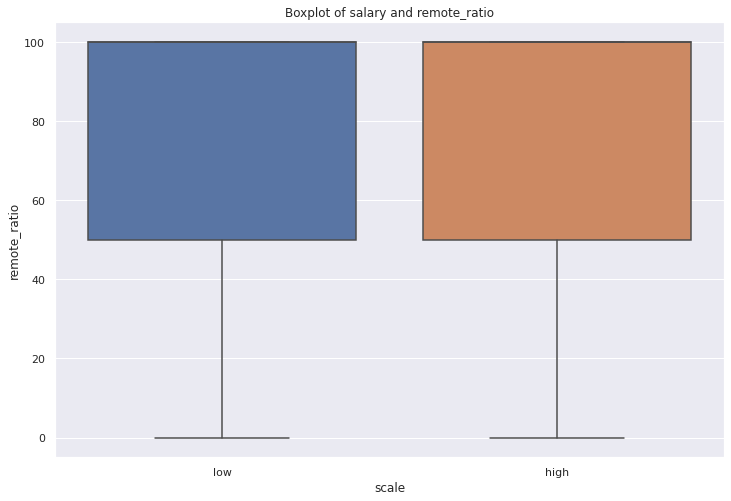

In [137]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x=scale, y='remote_ratio', data=df,)
ax.set_title("Boxplot of salary and remote_ratio")
plt.show()

The distribution of high and low salaries scale across remote_ratio is nearly similar.

**Explore 'salary_in_usd' variable**

/home/yi/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


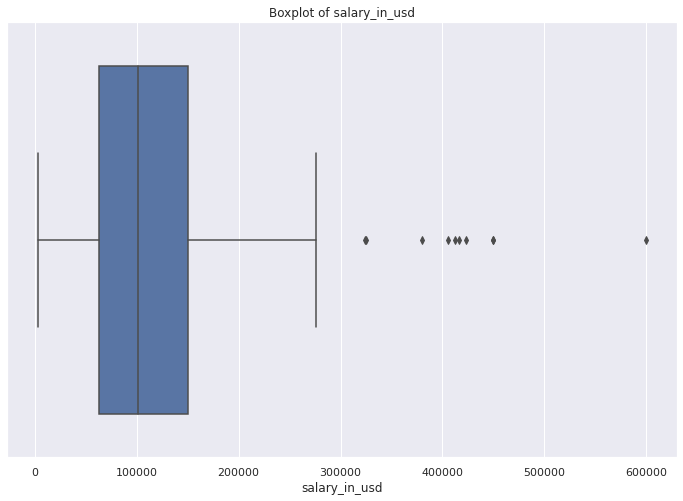

In [138]:
salary_in_usd = df.iloc[:,6]
sns.boxplot(salary_in_usd)
plt.title('Boxplot of salary_in_usd')
plt.show()

The salary_in_usd shows: This box plot shows a median salary_in_usd is 100000.  Most subjects have salary_in_usd between 70,000 and 150,000, but there are some subjects with salary_in_usd as low as 3000 or as high as 270,000. In addition, there are some outliers above 300000, showing that very few individual salary_in_usds are above 300000.

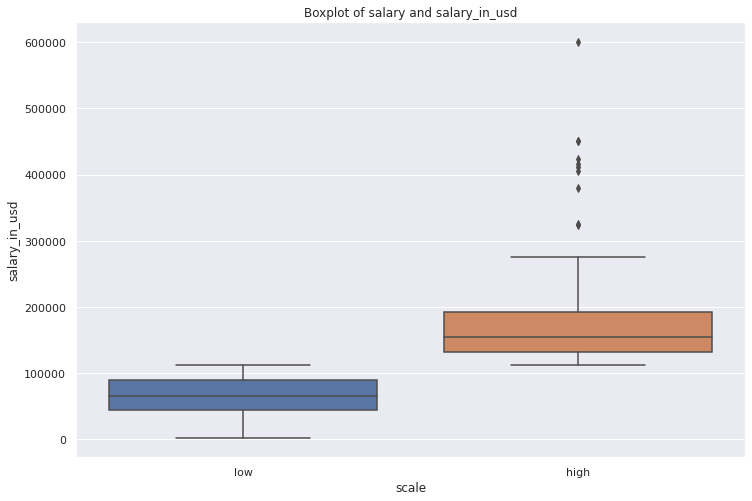

In [139]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x=scale, y='salary_in_usd', data=df,)
ax.set_title("Boxplot of salary and salary_in_usd")
plt.show()

For low salary scale: most subjects are lower than 100000,and the overall distribution is relatively even and normal.

For high salary scale: most subjects are higher than 112298. Besides, the skew in the overall distribution indicates that the data may not be normally distributed.

In [140]:
# plot correlation heatmap to find out correlations
df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.0,-0.08758,0.1705,0.07631
salary,-0.08758,1.0,-0.08391,-0.01461
salary_in_usd,0.1705,-0.08391,1.0,0.1321
remote_ratio,0.07631,-0.01461,0.1321,1.0


<AxesSubplot:>

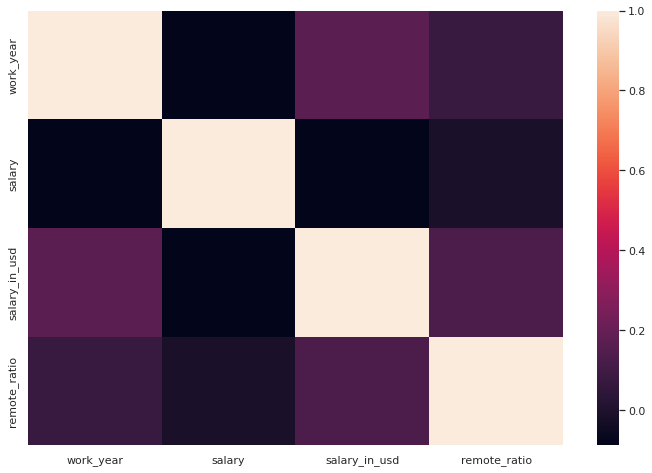

In [141]:
sns.heatmap(df.corr())

There is weak positive correlation between work_year and salary, with correlation coefficient = 0.1705.

#### 1. 2 Exploration Catalogical Variables Analysis

In [249]:
#categorical data
categorical_data = []
for categorical in df.columns:
    if df[categorical].dtype == 'object':
        categorical_data.append(categorical)

df[categorical_data]

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size,scale
0,MI,FT,Data Scientist,EUR,DE,DE,L,low
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S,high
2,SE,FT,Big Data Engineer,GBP,GB,GB,M,low
3,MI,FT,Product Data Analyst,USD,HN,HN,S,low
4,SE,FT,Machine Learning Engineer,USD,US,US,L,high
...,...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,USD,US,US,M,high
603,SE,FT,Data Engineer,USD,US,US,M,high
604,SE,FT,Data Analyst,USD,US,US,M,high
605,SE,FT,Data Analyst,USD,US,US,M,high


In [92]:
# Show the descriptive statistics
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size,scale
count,607,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3,2
top,SE,FT,Data Scientist,USD,US,US,M,low
freq,280,588,143,398,332,355,326,337


There are 8 categorical variables: 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size', 'scale'.


**Explore 'scale' target variable**

In [143]:
#frequency distribution of values
scale =  df.iloc[:,11]
scale.value_counts()

low     337
high    270
Name: scale, dtype: int64

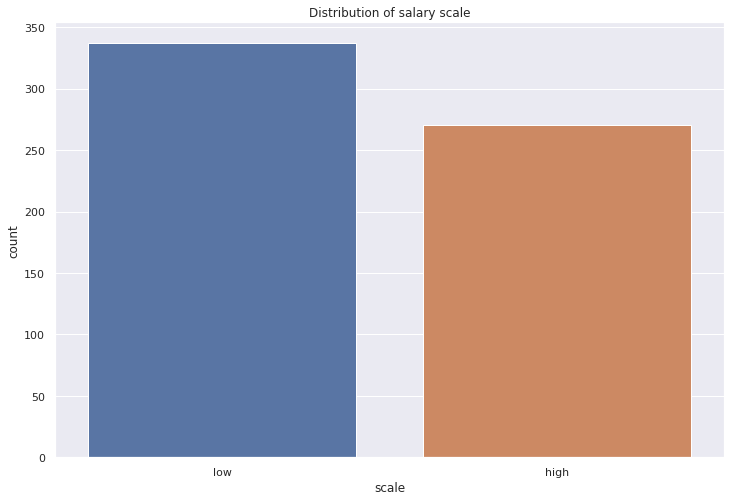

In [144]:
sns.countplot(x=scale,data=df)
plt.title('Distribution of salary scale')
plt.show()

The difference between the percentage of high salary and low salary is not significant.

**Explore 'scale' wrt 'experience_level' variable**

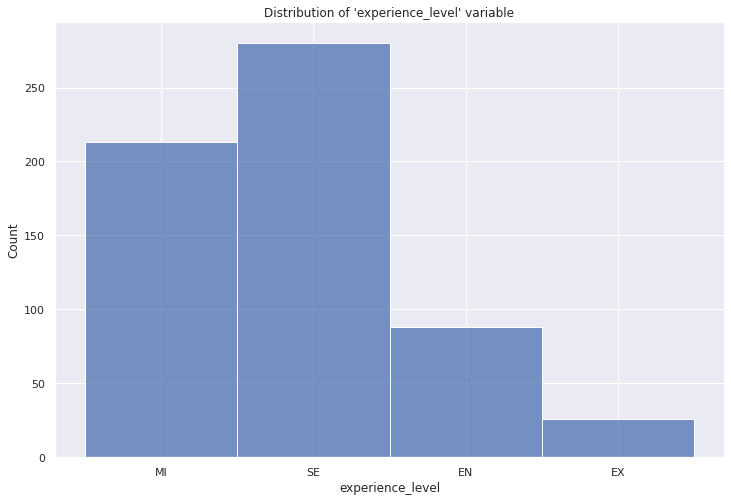

In [145]:
experience_level = df.iloc[:,1]
sns.histplot(experience_level)
plt.title("Distribution of 'experience_level' variable")
plt.show()

The counts of MI and SE are the two largest classes.

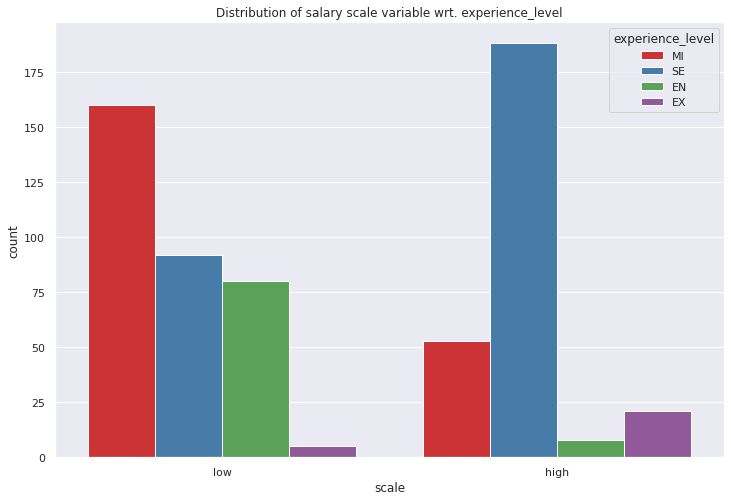

In [146]:
sns.countplot(x=scale, hue=experience_level, data=df, palette="Set1")
plt.title("Distribution of salary scale variable wrt. experience_level")
plt.show()

In low salary scale, the count of MI level is the most and the count of EX is the least.

In high salary scale, the count of SE level is the most and the count of EN is the least.

 EN:Entry-level  MI:Mid-level  SE:Senior-level  EX:Executive-level

**Explore 'employment_type' variable wrt 'scale' variable**

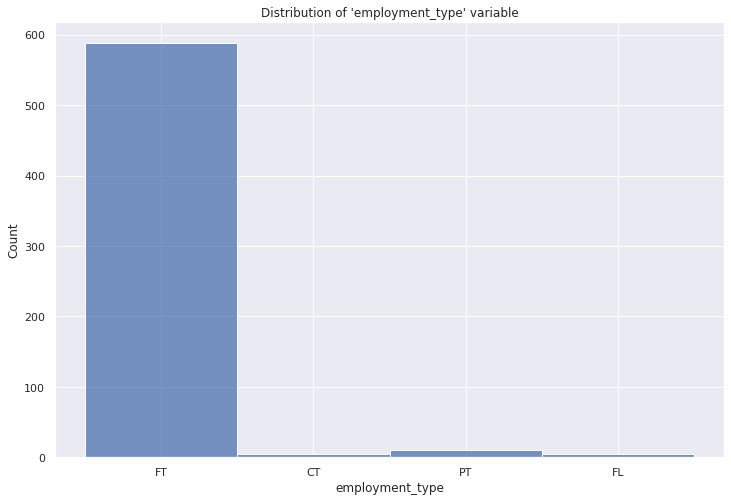

In [147]:
employment_type = df.iloc[:,2]
sns.histplot(employment_type)
plt.title("Distribution of 'employment_type' variable")
plt.show()

PT: Part-time FT: Full-time CT: Contract FL: Freelance. The vast majority of people fall into the FT type.

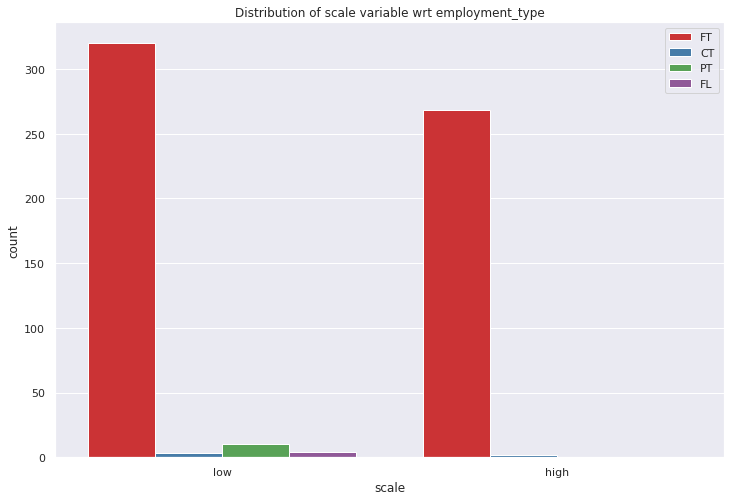

In [148]:
sns.countplot(x=scale, hue=employment_type, data=df, palette="Set1")
plt.title("Distribution of scale variable wrt employment_type")
plt.legend(loc="upper right")
plt.show()

the fact that can be observed from the above figure is that PT and FL are only shown in the low salary scale.

**Explore 'company_location' variable wrt 'scale' variable**

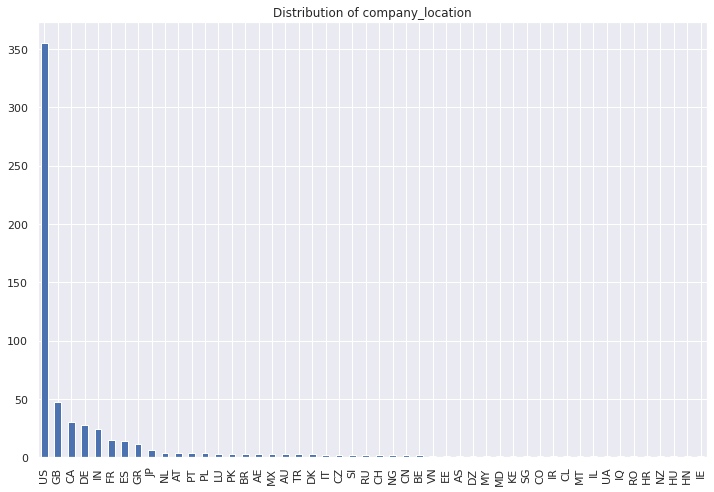

In [149]:
company_location = df.iloc[:,9]
company_location.value_counts().plot(kind="bar")
plt.title("Distribution of company_location")
plt.show()

The vast majority of companies located in US.

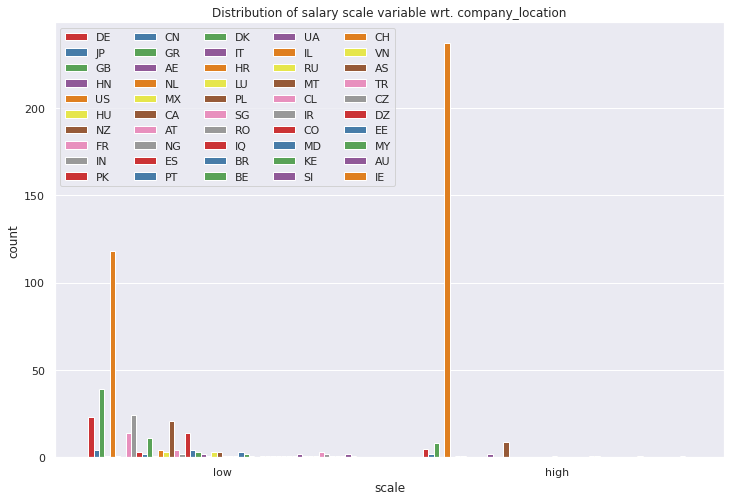

In [150]:
plt.subplots(figsize=(12,8))
sns.countplot(x=scale, hue=company_location, data=df, palette="Set1")
#plt.legend([], frameon=False)
plt.legend(ncol=5)
plt.title("Distribution of salary scale variable wrt. company_location")
plt.show()


From the above figure we can observe that in high salary scale there are only few countries. However, what is needed to mention is that, most US companies offer higher salary scale.
Because 'company_location' and 'employee_residence' almost have the same data, so here we only analyse 'company_location'.

**Explore 'company_size' variable wrt 'scale' variable**

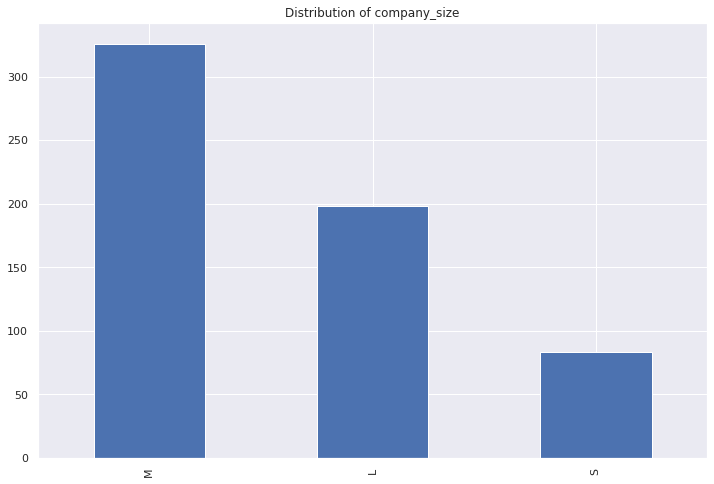

In [151]:
company_size = df.iloc[:,10]
company_size.value_counts().plot(kind="bar")
plt.title("Distribution of company_size")
plt.show()

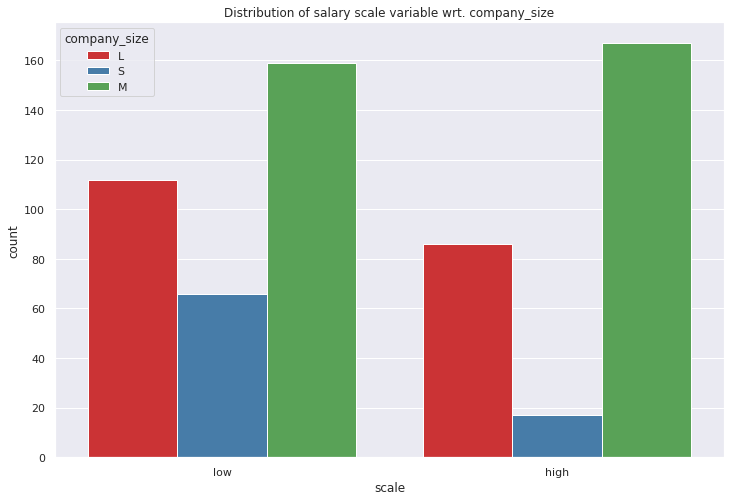

In [152]:
#plt.figure(figsize=(15,4))
company_size = df.iloc[:,10]
sns.countplot(x=scale, hue=company_size, data=df, palette="Set1")
plt.title("Distribution of salary scale variable wrt. company_size")
plt.show()

S: small M: middle L: large 
High salary scale appears rarely in small size company. 

### 2 Preprocessing
#### 2.1 Dealing with Missing Data

In [153]:
# Check for missing values that are null
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
scale                 0
dtype: int64

The result shows no null missing values.

In [154]:
# Check for special missing values
for i in categorical_data:
    print(df[i].value_counts())

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer             

Observing the above results, it is found that there is no missing values in all categories neither. Therefore, we do not need to remove the null data.

#### 2.2 Dealing with Outliers

Use IQR to identify outliers, outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR.

Here are some important parameters:

lower (first) quartile Q1

median (second quartile) Q2 

upper (third) quartile Q3 

interquartile range, IQR = Q3 - Q1

lower 1.5 x IQR whisker = Q1 - 1.5 x IQR 

upper 1.5 x IQR whisker = Q3 + 1.5 x IQR 

In [155]:
# to remove the outliers and return a new dataframe
def outliers_remove(df_in,index):
    q1 = df.iloc[:,index].quantile(0.25)
    q3  = df.iloc[:,index].quantile(0.75)
    iqr = q3 -  q1 
    fence_low = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    df_out = df[(df.iloc[:,index] > fence_low) & (df.iloc[:,index] < fence_high)]
    return df_out

Outliers in numerical data are removed and the row where the outlier is located is deleted. No outlier processing is required for categorical data.

there are 4 numerical variables:'work_year', 'salary', 'salary_in_usd', 'remote_ratio', the columns indexes are respectively 0, 4, 6, 8. The outlier removal is performed for each numeric variable in turn.

In [156]:
df_remove0 = outliers_remove(df,0)
df_remove4 = outliers_remove(df_remove0,4)
df_remove6 = outliers_remove(df_remove4,6)
df_removed = outliers_remove(df_remove6,8)
df_removed

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,scale
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,low
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,high
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,low
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,low
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,high
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,high
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,high
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,high
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,high


It can be seen that the number of samples does not change, which means this dataset has no outliner.

### 3 Feature Extraction
Feature Extraction is to transform/compress data in order to reduce dimensionality.

Having previously dealt with missing values and outliers, the features of the categorical data now need to be extracted for later model learning.


The random forest classifier, which can handle data with high dimensionality (many features) without dimensionality reduction, without performing feature selection, and which can also ascertain the significance of features and can ascertain the interaction between various features, will be used in the model training. As a result, feature selection is not required; instead, categorical data must be encoded.

#### 3.1 Categorical Data Encoding

It can be seen that after feature extraction of the classified data, the dataset has changed from 12 columns to 191 columns.

In [190]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location','company_size','salary_currency','scale'])

X1 = encoder.fit_transform(df)
X1 = pd.DataFrame(X1)
X1.head()


,work_year,experience_level_1,experience_level_2,experience_level_3,experience_level_4,employment_type_1,employment_type_2,employment_type_3,employment_type_4,job_title_1,...,company_location_46,company_location_47,company_location_48,company_location_49,company_location_50,company_size_1,company_size_2,company_size_3,scale_1,scale_2
0,2020,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,2020,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2020,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,2020,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2020,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


#### 4 Hypothesis Testing
According to the previous EDA, it is hypothesized that the average annual salary for data science is higher than $100,000.

Step 1 :

$H_0: \mu = 100000$

$H_1: \mu > 100000$

Step 2 :
Set α = 0.05

Step 3 :

σ is unknown. So we use t-test. 
$
t = \frac{\bar x-\mu_0}{s_x}         
$
where
$
s_x = \frac{s}{\sqrt n}
$



In [166]:
# Perform t-test on one sample sets
from scipy.stats import t
critical_value = t.ppf(0.95,606) #  degree of freedom is equal sample size minus 1
print("critical value : ",critical_value)

critical value :  1.6473719691883677


In [167]:
from scipy import stats
t_value = stats.ttest_1samp(df.iloc[:,6],100000)
print(t_value)

Ttest_1sampResult(statistic=4.269995376558279, pvalue=2.2688287255787327e-05)


Two ways to interpret:

1. The test statistic (4.269995376558279) is larger than the critical value(1.6473719691883677). We reject the null hypothesis meaning that the average annual salary for data science is above $100,000.

2. The p-value(2.2688287255787327e-05) is smaller than $\alpha$ (0.05) . We reject $H_0$, accept $H_1$, same conclusion.

### 5 Statistical Learning
A random forest is is an ensemble learning method for classification. It fits a number of decision tree classifiers on various sub-datasets of the datasets and uses majority voting or estimated class probabilities to classificate. Generally , the predictive result is improved and random forest can controll over-fitting.This classifier can handle data with many features and without doing feature selection, and it can also determine the importance of features and the interaction between different features.

In our random forest, we use the Gini coefficient to evaluate the importance of features and thus perform feature selection.

$Gini = 1 - \sum_{C}^{i=1}(p_{i}^2) $

Here, $p_i$ represents the relative frequency of the class you are observing in the dataset and $C$ represents the number of classes.

Entropy also can be used to determine how nodes branch in a decision tree.

$Entropy = \sum_{C}^{i=1}-p_{i}*log_2(p_i)$

#### 5.1 Feature Scaling
Since the range of values of raw data varies widely, objective functions will not work properly without normalization.
Standardization (Z-score Normalization):
$z = (x - \overline{x})/\sigma$

In [191]:
#apply standardization (Z-score Normalization)
X1 = X1.drop(columns = ['scale_2','scale_1'])
columns = X1.columns
scaler = RobustScaler()
X2 = scaler.fit_transform(X1)
X = pd.DataFrame(X2)
X.head

<bound method NDFrame.head of      0    1    2    3    4    5    6    7    8    9    ...  179  180  181  \
0   -2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1   -2.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2   -2.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3   -2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4   -2.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
602  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
603  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
604  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
605  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
606  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     182  183  184  185  186  187  188  
0   

#### 5.2 Dataset Split

X from feature extraction and y from the response variable 'scale'，split the data into random subsets X_train, X_test, y_train, y_test using *train_test_split* method.

Training and test sets are in the ratio of 8:2.

In [239]:
#get y from 'scale' column
y = df_removed.iloc[:,-1]
#split X dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 123)
X_train.head

<bound method NDFrame.head of      0    1    2    3    4    5    6    7    8    9    ...  179  180  181  \
34  -2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
330  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
33  -2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
190 -1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
338  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
98  -1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
322  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
382  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
365  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
510  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     182  183  184  185  186  187  188  
34  

In [227]:
y_train.head

<bound method NDFrame.head of 34      low
330    high
33     high
190    high
338    high
       ... 
98      low
322    high
382    high
365    high
510    high
Name: scale, Length: 485, dtype: object>

#### 5.3 Models Training
By changing the hyperparameter number of decision trees, check its effect on accuracy.

In [247]:
#create an object for the random forest classifier and start training the model.
# The size of this dataset is small. Therefore, we decide to use k-folder cross validation to train.  

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import metrics

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=10, max_depth=4,criterion="gini"))
kf = KFold(n_splits=5, shuffle=True,random_state= 123) # k value
kfold = kf.split(X_train, y_train)
acc = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    acc.append(score)
    print('Fold: %2d,Accuracy: %.3f' % (k+1, score))
print('\n\nThe accuracy of the model under cross-validation is: %.3f +/- %.3f' %(np.mean(acc), np.std(acc)))

Fold:  1,Accuracy: 0.959
Fold:  2,Accuracy: 0.938
Fold:  3,Accuracy: 0.959
Fold:  4,Accuracy: 0.907
Fold:  5,Accuracy: 0.979


The accuracy of the model under cross-validation is: 0.948 +/- 0.024


### 6 Reference

[1] dataset come from: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries
[2] https://zhuanlan.zhihu.com/p/450460227
[3] https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance 
[4] https://medium.com/capital-one-tech/random-forest-algorithm-for-machine-learning-c4b2c8cc9feb
[5] https://en.wikipedia.org/wiki/Random_forest 
[6] https://www.kaggle.com/lodetomasi1995/income-classification  
[7] official document about 